## Linear Regression in scikit-learn

Here we show how the linear regression from above is implemented in scikit-learn. First we load an apropriate dataset. 

**The diabetes dataset** consists of 10 physiological variables (age, sex, weight, blood pressure) measured on 442 patients, and an indication of disease progression after one year:

In [16]:
import numpy as np
from sklearn import datasets

import pandas as pd

diabetes = datasets.load_diabetes()
diabetes_X_train = diabetes.data[:-20]
diabetes_X_test  = diabetes.data[-20:]
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test  = diabetes.target[-20:]

from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(diabetes_X_train, diabetes_y_train)
print(regr.coef_)
# The mean square error
np.mean((regr.predict(diabetes_X_test)-diabetes_y_test)**2)
# Explained variance score: 1 is perfect prediction
# and 0 means that there is no linear relationship
# between X and Y.
regr.score(diabetes_X_test, diabetes_y_test) 

[  3.03499549e-01  -2.37639315e+02   5.10530605e+02   3.27736980e+02
  -8.14131709e+02   4.92814588e+02   1.02848452e+02   1.84606489e+02
   7.43519617e+02   7.60951722e+01]


0.58507530226905713

### Shrinkage

In the case when we have more attributes than examples, small noise in the example can yield completely different solutions. 

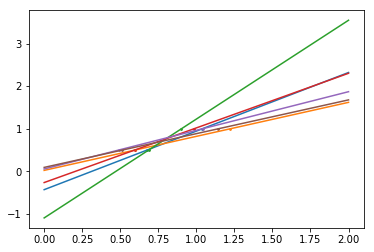

In [17]:
X = np.c_[ .5, 1].T
y = [.5, 1]
test = np.c_[ 0, 2].T
regr = linear_model.LinearRegression()
import pylab as pl 
pl.figure() 
np.random.seed(0)
for _ in range(6): 
    this_X = .1*np.random.normal(size=(2, 1)) + X
    regr.fit(this_X, y)
    pl.plot(test, regr.predict(test)) 
    pl.scatter(this_X, y, s=3)

#### Solution: Shrinking the coefficients

In high-dimensional statistical learning, we try to shrink the coefficients so that they become minimal. This is called ridge regression. In a sense we add a-priori knowledge and restrict the number of possible regression solutions to those with very small weights.

By introducing this constraint, we avoid that our model overfits on noisy data. This form of a-priori knowledge, the bias of the model towards a particular solution, is called a regularization.

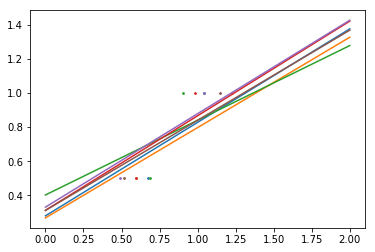

In [18]:
regr = linear_model.Ridge(alpha=.1)

pl.figure() 

np.random.seed(0)
for _ in range(6): 
     this_X = .1*np.random.normal(size=(2, 1)) + X
     regr.fit(this_X, y)
     pl.plot(test, regr.predict(test)) 
     pl.scatter(this_X, y, s=3) 